# <font color='#0000CD'>Using SVM to Predict Purchase Intent of E-Commerce Users</font>

## Model Building, Training, Evaluation, and Selection Process for Classification

### Objective:
Evaluate which attributes influence a user's online purchasing decisions and build a predictive model to forecast future purchases.

### Problem Statement & Data Source:
In this project, our task is to assess which attributes influence an online user’s decision to purchase products and to construct a predictive model to forecast future purchase intentions.

We will use the Online Shoppers Purchasing Intention Dataset from the UCI Machine Learning Repository.

#### The dataset can be found here: [dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

The dataset consists of feature vectors belonging to 12,330 online sessions. It was formed such that each session belongs to a different user over a period of one year to avoid any bias towards a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical attributes and 8 categorical ones. The 'Revenue' attribute can be used as the class label.

### Models Used:
* Base Model with Linear Kernel
* Model with Linear Kernel and Standardized Data (Scaled)
* Hyperparameter Optimization with Grid Search and RBF Kernel
* Hyperparameter Optimization with Grid Search and Polynomial Kernel

This notebook will cover all stages of the machine learning process, from data preparation to model evaluation, using Support Vector Machines (SVM) to predict the purchase intent of e-commerce users.


In [70]:
# Python Version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.7


## Importing Packages

In [71]:
# Imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## Load and Data Dictionary

In [72]:
# Loading the data
df_original = pd.read_csv('data/online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Dictionary:

**"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"**, and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in this session and the total time spent on each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user performs an action, such as moving from one page to another.

The features **"Bounce Rate"**, **"Exit Rate"**, and **"Page Value"** represent the metrics measured by "Google Analytics" for each page on the e-commerce site.

* The value of the **"Bounce Rate"** feature for a web page refers to the percentage of visitors who enter the site from that page and leave ("bounce") without triggering any other requests to the server during that session

* The value of the **"Exit Rate"** feature for a specific web page is calculated as the percentage that was the last in the session, for all page views to that page

* The **"Page Value"** feature represents the average value for a web page that a user visited before completing an e-commerce transaction

The **"Special Day"** feature indicates the closeness of the visit time to a specific special day (e.g., Mother's Day, Valentine's Day) on which sessions are more likely to end with a transaction. The value of this attribute is determined considering the dynamics of e-commerce, such as the duration between the order date and the delivery date. For example, on Valentine's Day, this value assumes a non-zero value between February 2 and February 12 (Valentine's Day in the US and Europe), zero before and after this date, unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes the type of **"Operating System"**, **"Browser"**, **"Region"**, **"Traffic Type"**, **"Visitor Type"** as new or returning visitor, a boolean value indicating if the visit date is a **"Weekend"**.

### The target variable (Revenue) is boolean, with True if the session generated revenue and False if it did not.

## Exploratory Analysis

In [73]:
# Shape
df_original.shape

(12330, 18)

In [74]:
# Data Type
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [75]:
# Checking Missing Values
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [76]:
# Removing Missing Values
df_original.dropna(inplace = True)

In [77]:
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [78]:
# Shape
df_original.shape

(12316, 18)

In [79]:
# Checking Unique Values
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

#### For visualization purposes, we will divide the data into continuous and categorical variables. We will treat all variables with fewer than 30 unique entries as categorical.

In [80]:
# Creates a copy of the original dataset
df = df_original.copy()

# Empty lists for results
continuous = []
categorical = []

# Loop 
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [81]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [82]:
# Continuous variables
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [83]:
# Categorical variables
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


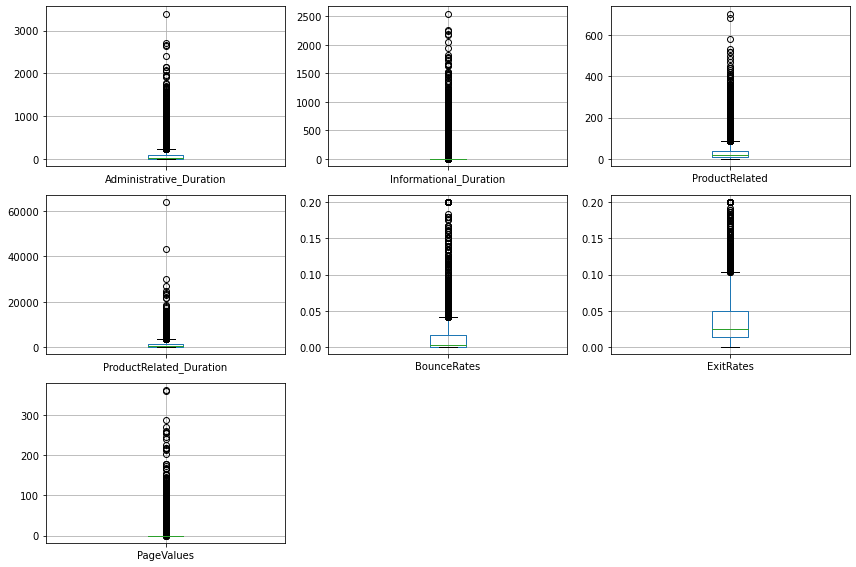

In [84]:
# Plot of continuous variables
fig = plt.figure(figsize = (12,8))

# Loop
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
plt.savefig('images/boxplot1.png')

#### Continuous variables appear to be extremely skewed. Applying a log transformation for better visualization.

In [85]:
# Log transformation in continuous variables
# Adding + 1 as a constant to create a "rule" in the transformation
df[continuous] = np.log1p(1 + df[continuous])

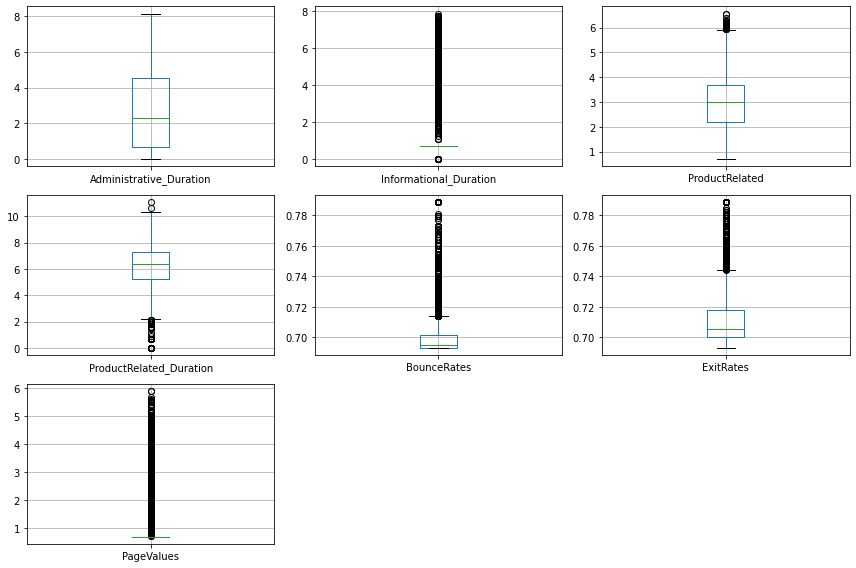

In [86]:
# Plot of continuous variables
fig = plt.figure(figsize = (12,8))

# Loop
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('images/boxplot2.png')

#### Correlation Matrix Between Continuous Variables.

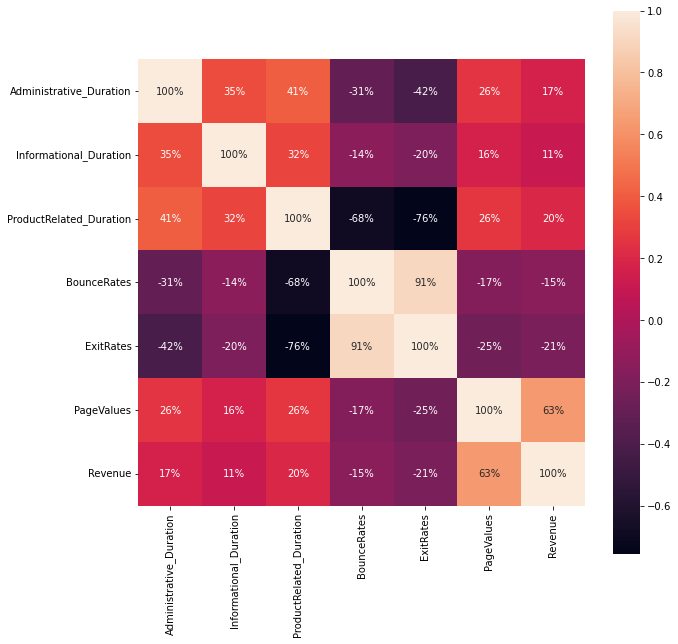

In [87]:
# Área de plotagem
plt.figure(figsize=(10, 10))

# Matriz de Correlação 
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax=1., square=True, annot=True, fmt='.0%')

plt.show()

#### Visualization of categorical variable to analyze how the target variable is influenced by them.

<AxesSubplot:title={'center':'Sale or Not'}, xlabel='Revenue', ylabel='count'>

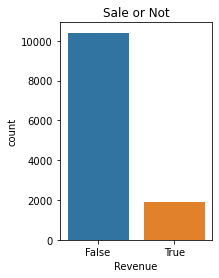

In [88]:
plt.subplot(1,2,2)
plt.title("Sale or Not")
sns.countplot(df['Revenue'])

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

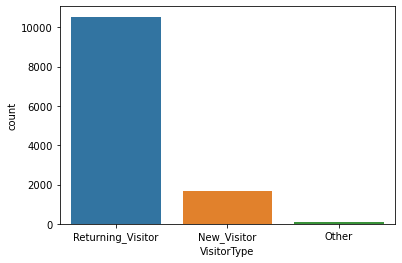

In [89]:
plt.xlabel("Visitor Type")
sns.countplot(df['VisitorType'])

<AxesSubplot:xlabel='VisitorType'>

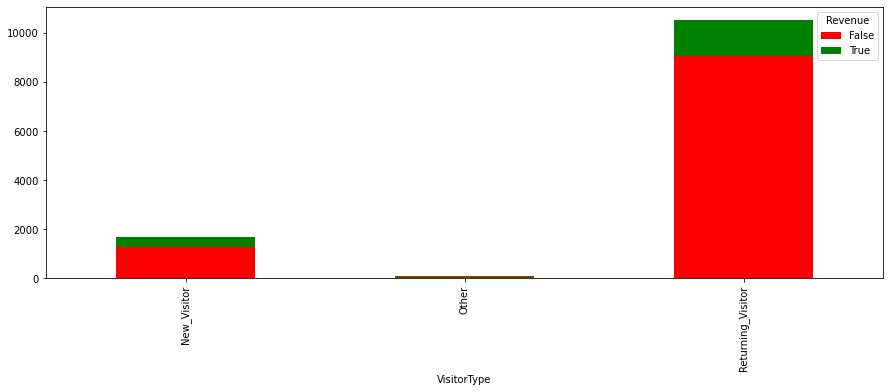

In [90]:
# Visitor x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

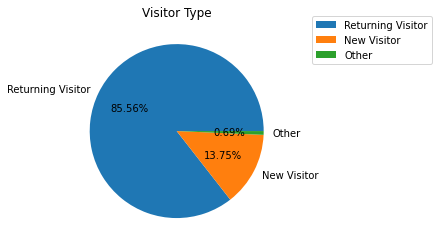

In [91]:
labels = ['Returning Visitor', 'New Visitor', 'Other']
plt.title("Visitor Type")
plt.pie(df['VisitorType'].value_counts(), labels=labels, autopct='%.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05))
plt.show()

<AxesSubplot:xlabel='Weekend', ylabel='count'>

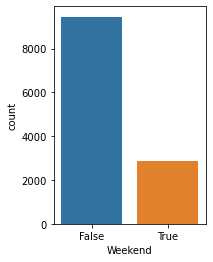

In [92]:
plt.subplot(1,2,1)
sns.countplot(df['Weekend'])

<AxesSubplot:xlabel='Weekend'>

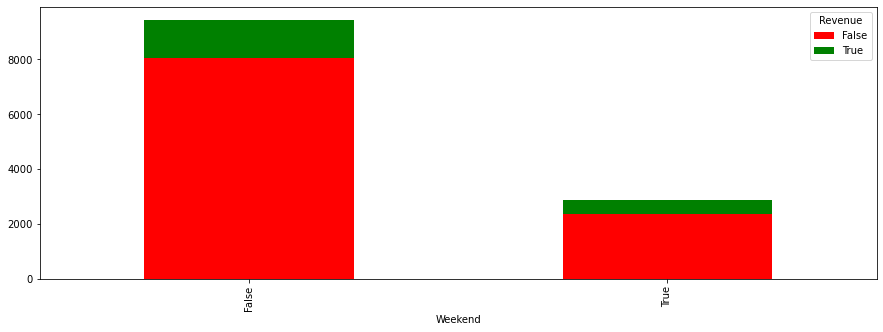

In [93]:
# Weekend x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (15, 5), 
                                               color = ['red', 'green'])

<AxesSubplot:title={'center':'Operating Systems'}, xlabel='OperatingSystems', ylabel='count'>

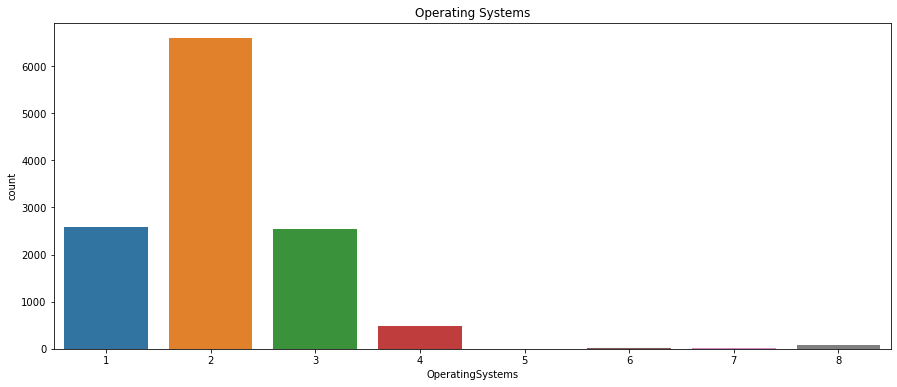

In [94]:
plt.figure(figsize = (15,6))
plt.title("Operating Systems")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(df['OperatingSystems'])

<AxesSubplot:xlabel='OperatingSystems'>

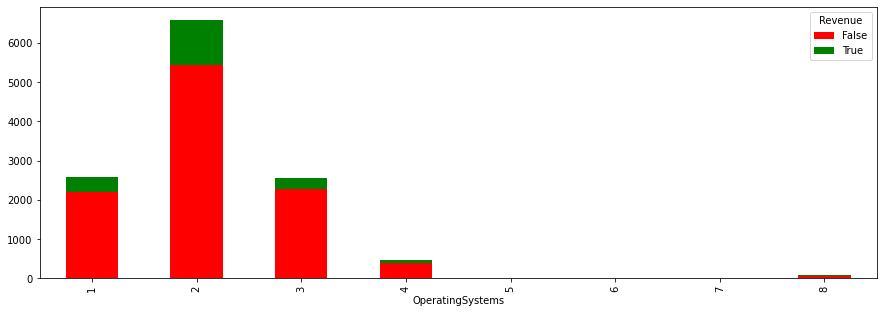

In [95]:
# OS x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (15, 5), 
                                                        color = ['red', 'green'])

<AxesSubplot:title={'center':'Traffic Type'}, xlabel='TrafficType', ylabel='count'>

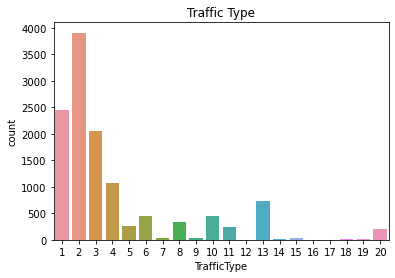

In [96]:
plt.title("Traffic Type")
sns.countplot(df['TrafficType'])

<AxesSubplot:xlabel='TrafficType'>

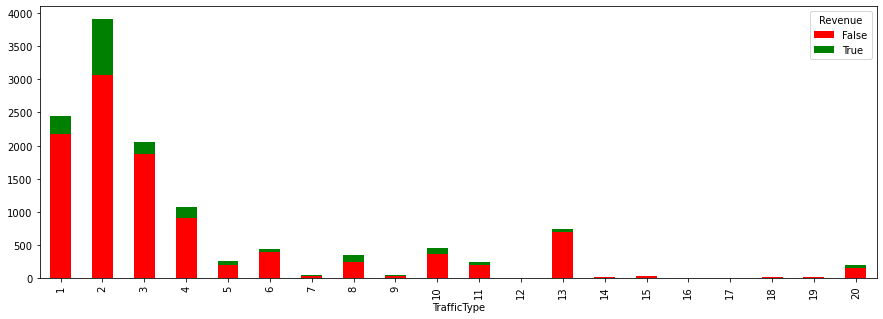

In [97]:
# Traffic x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

## Data Preprocessing

In [98]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [99]:
# Creates encoder
lb = LabelEncoder()

# Apply encoder 
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove missing values
df_original.dropna(inplace = True)

In [100]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [101]:
# Shape
df_original.shape

(12316, 18)

In [102]:
# Checking if the variable is balanced
target_count = df_original.Revenue.value_counts()
target_count

False    10408
True      1908
Name: Revenue, dtype: int64

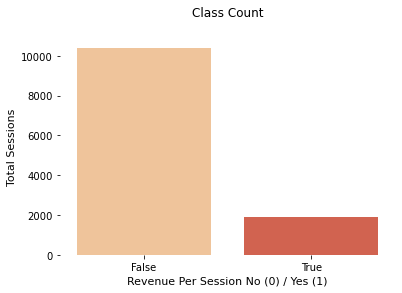

In [103]:
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [104]:
# Install and import imblearn
!pip install -q imblearn
import imblearn

In [105]:
# Shape
df_original.shape

(12316, 18)

In [106]:
# Explanatory variables
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [107]:
# Target variable
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

#### Class Balancing - Oversampling

In [108]:
from imblearn.over_sampling import SMOTE

# Seed to reproduce the same result
seed = 100

X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

# SMOTE
smote_bal = SMOTE(random_state = seed)

# Apply the balancer
X_res, y_res = smote_bal.fit_resample(X, y)

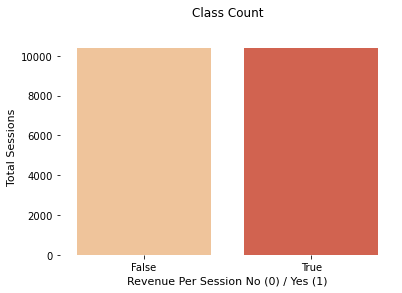

In [109]:
# Plot 
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Revenue Per Session No (0) / Yes (1)', fontsize = 11)
plt.ylabel('Total Sessions', fontsize = 11)
plt.title('Class Count\n')
plt.show()

In [110]:
# Original data shape
df_original.shape

(12316, 18)

In [111]:
# Resampled data shape
X_res.shape

(20816, 17)

In [112]:
# Resampled data shape
y_res.shape

(20816,)

In [113]:
X = X_res
y = y_res

In [114]:
# Training and Testing Data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## SVM Model

### Base Model with Linear Kernel

In [115]:
# Create the model
model_v1 = svm.SVC(kernel = 'linear')

In [116]:
# Training
start = time.time()
model_v1.fit(X_train, y_train)
end = time.time()
print('Training time:', end - start)

Training time: 2821.300991296768


In [117]:
# Predictions
predictions_v1 = model_v1.predict(X_test)

In [118]:
# Metrics dictionary
SVM_dict_v1 = {'Model':'SVM',
               'Version':'1',
               'Kernel':'Linear',
               'Precision':precision_score(predictions_v1, y_test),
               'Recall':recall_score(predictions_v1, y_test),
               'F1 Score':f1_score(predictions_v1, y_test),
               'Accuracy':accuracy_score(predictions_v1, y_test),
               'AUC':roc_auc_score(y_test, predictions_v1)}

In [119]:
# Print
print("Test Metrics:\n")
SVM_dict_v1

Test Metrics:



{'Model': 'SVM',
 'Version': '1',
 'Kernel': 'Linear',
 'Precision': 0.8688212927756654,
 'Recall': 0.7895191477109128,
 'F1 Score': 0.8272740986574144,
 'Accuracy': 0.8166533226581265,
 'AUC': 0.8160875644843042}

### Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [120]:
# Standardization in train and test data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [121]:
X_train_scaled

array([[ 0.67023596,  0.00746589, -0.4556655 , ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.71405441, -0.53155654, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [ 0.9117153 , -0.18078072, -0.4556655 , ...,  0.57746102,
         0.54253778,  1.44038165],
       ...,
       [-0.21784301,  0.00977669,  1.83111142, ..., -0.50179946,
         0.54253778, -0.69426044],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.50179946,
        -2.06175081, -0.69426044],
       [-0.37088559, -0.29288262,  0.58272764, ..., -0.50179946,
        -0.75960651, -0.69426044]])

In [122]:
X_test_scaled

array([[-0.74974984, -0.52847418, -0.4556655 , ...,  0.57746102,
        -2.06175081,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       [-0.80989566, -0.53903796, -0.4556655 , ..., -0.77161458,
         0.54253778,  1.44038165],
       ...,
       [-0.80989566, -0.53903796, -0.4556655 , ...,  0.57746102,
         0.54253778, -0.69426044],
       [ 1.03373541,  1.74922518, -0.4556655 , ..., -0.50179946,
         0.54253778,  1.44038165],
       [ 0.3044991 , -0.28747987,  1.09682136, ..., -0.50179946,
         0.54253778, -0.69426044]])

In [123]:
# Create model
model_v2 = svm.SVC(kernel = 'linear')

In [124]:
# Training
start = time.time()
model_v2.fit(X_train_scaled, y_train)
end = time.time()
print('Training time:', end - start)

Training time: 4.668801784515381


In [125]:
# Predictions
predictions_v2 = model_v2.predict(X_test_scaled)

In [126]:
# Dictionary
SVM_dict_v2 = {'Model':'SVM',
               'Version':'2',
               'Kernel':'Linear with Standardized Data',
               'Precision':precision_score(predictions_v2, y_test),
               'Recall':recall_score(predictions_v2, y_test),
               'F1 Score':f1_score(predictions_v2, y_test),
               'Accuracy':accuracy_score(predictions_v2, y_test),
               'AUC':roc_auc_score(y_test, predictions_v2)}

In [127]:
# Print
print("Test Metrics:\n")
SVM_dict_v2

Test Metrics:



{'Model': 'SVM',
 'Version': '2',
 'Kernel': 'Linear with Standardized Data',
 'Precision': 0.7896070975918885,
 'Recall': 0.8909545942080801,
 'F1 Score': 0.8372249286074248,
 'Accuracy': 0.844835868694956,
 'AUC': 0.8454348210523379}

### Hyperparameter Optimization with Grid Search and RBF Kernel

In [128]:
# Create model
model_v3 = svm.SVC(kernel = 'rbf')

# Grid values
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Hyperparameter Grid
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
model_v3_grid_search_rbf = GridSearchCV(model_v3, svm_param_grid, cv = 3)

# Training
model_v3_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Training Accuracy
print(f"Training Accuracy: {model_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Ideal Hyperparameters: {model_v3_grid_search_rbf.best_params_}")

Model Training Time with Grid Search: 68.09780311584473
Training Accuracy: 87.41%

Ideal Hyperparameters: {'C': 200.0, 'gamma': 0.003}


In [129]:
# Predictions
predictions_v3 = model_v3_grid_search_rbf.predict(X_test_scaled)

In [130]:
# Metrics dictionary
SVM_dict_v3 = {'Model':'SVM',
               'Version':'3',
               'Kernel':'RBF with Standardized Data',
               'Precision':precision_score(predictions_v3, y_test),
               'Recall':recall_score(predictions_v3, y_test),
               'F1 Score':f1_score(predictions_v3, y_test),
               'Accuracy':accuracy_score(predictions_v3, y_test),
               'AUC':roc_auc_score(y_test, predictions_v3)}

In [131]:
# Print
print("Test Metrics:\n")
SVM_dict_v3

Test Metrics:



{'Model': 'SVM',
 'Version': '3',
 'Kernel': 'RBF with Standardized Data',
 'Precision': 0.8361850443599493,
 'Recall': 0.8957909029192125,
 'F1 Score': 0.8649623074401835,
 'Accuracy': 0.8680544435548438,
 'AUC': 0.8684000650741152}

### Hyperparameter Optimization with Grid Search and Polynomial Kernel

In [132]:
# Create model
model_v4 = svm.SVC(kernel = 'poly')

# Grid values
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Hyperparameter Grid
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
model_v4_grid_search_poly = GridSearchCV(model_v4, param_grid_poly, cv = 3)

# Training
model_v4_grid_search_poly.fit(X_train_scaled, y_train)
end = time.time()
print('Model Training Time with Grid Search:', end - start)

# Training Accuracy
print(f"Training Accuracy: {model_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Ideal Hyperparameters: {model_v4_grid_search_poly.best_params_}")

Model Training Time with Grid Search: 54.325199604034424
Training Accuracy: 86.14%

Ideal Hyperparameters: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [133]:
# Predictions
predictions_v4 = model_v4_grid_search_poly.predict(X_test_scaled)

In [134]:
# Metrics dictionary
SVM_dict_v4 = {'Model':'SVM',
               'Version':'4',
               'Kernel':'Polynomial with Standardized Data',
               'Precision':precision_score(predictions_v4, y_test),
               'Recall':recall_score(predictions_v4, y_test),
               'F1 Score':f1_score(predictions_v4, y_test),
               'Accuracy':accuracy_score(predictions_v4, y_test),
               'AUC':roc_auc_score(y_test, predictions_v4)}

In [135]:
# Print
print("Test Metrics:\n")
SVM_dict_v4

Test Metrics:



{'Model': 'SVM',
 'Version': '4',
 'Kernel': 'Polynomial with Standardized Data',
 'Precision': 0.811787072243346,
 'Recall': 0.8902015288394719,
 'F1 Score': 0.8491879350348028,
 'Accuracy': 0.8542834267413931,
 'AUC': 0.8547442968856743}

In [136]:
# Concatenates all dictionaries in a Pandas dataframe
resume = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3),
                       'SVM_dict_v4':pd.Series(SVM_dict_v4)})

In [137]:
# Print
resume

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3,SVM_dict_v4
Model,SVM,SVM,SVM,SVM
Version,1,2,3,4
Kernel,Linear,Linear with Standardized Data,RBF with Standardized Data,Polynomial with Standardized Data
Precision,0.868821,0.789607,0.836185,0.811787
Recall,0.789519,0.890955,0.895791,0.890202
F1 Score,0.827274,0.837225,0.864962,0.849188
Accuracy,0.816653,0.844836,0.868054,0.854283
AUC,0.816088,0.845435,0.8684,0.854744


### Making Predictions with the Trained Model

In [138]:
# New register
new_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [139]:
# Standardizing the registry
new_x_scaled = StandardScaler().fit_transform(new_x)

In [140]:
# Prediction
prediction_new_x = model_v3_grid_search_rbf.predict(new_x_scaled)

In [141]:
prediction_new_x

array([ True])

# Fim